In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from dateutil import parser

In [3]:
weather_data = pd.read_csv('weather_data.csv')
price_data = pd.read_csv('crop_data.csv')

In [4]:
import pandas as pd
from dateutil import parser
import numpy as np
# date_formats = ["%d/%m/%Y", "%d-%b-%Y"]

# Define a function to parse the date, handling NaN values
def parse_date(x):
    try:
        return parser.parse(str(x), dayfirst=True, yearfirst=True)
    except (TypeError, ValueError):
        return np.nan

# Apply the parsing function to the date column
weather_data['Date'] = weather_data['Date'].apply(parse_date)

# Convert to a standard format, for example, 'YYYY-MM-DD'
weather_data['Date'] = pd.to_datetime(weather_data['Date']).dt.strftime('%Y-%m-%d')

# Display the DataFrame
weather_data.head()
print(weather_data)

            Date  tempmax  tempmin  temp  humidity   prcp
0     2013-06-01     26.1     20.2  22.6      89.0   20.0
1     2013-06-02     27.0     20.1  22.8      84.7    5.0
2     2013-06-03     27.1     19.9  22.5      83.3    4.0
3     2013-06-04     28.6     19.9  24.0      75.9    0.0
4     2013-06-05     30.0     21.0  25.2      73.1    0.0
...          ...      ...      ...   ...       ...    ...
3861  2023-12-27     28.9     15.5  21.7      66.9    0.0
3862  2023-12-28     27.9     17.9  22.4      74.4    0.0
3863  2023-12-29     26.9     19.1  22.1      77.9    0.0
3864  2023-12-30     29.8     18.9  23.2      72.6    0.0
3865  2023-12-31     27.9     17.0  22.0      73.9    0.0

[3866 rows x 6 columns]


In [5]:
price_data['Date'] = pd.to_datetime(price_data['Date'], format='%d-%m-%Y')
price_data.head()
print(price_data)

           Date    Minimum  Maximum    Average
0    2013-06-01  21.272727     26.0  23.636364
1    2013-06-02  21.272727     26.0  23.636364
2    2013-06-03  21.272727     26.0  23.636364
3    2013-06-04  21.272727     26.0  23.636364
4    2013-06-05  21.272727     26.0  23.636364
...         ...        ...      ...        ...
3832 2023-11-28  15.000000     26.0  20.500000
3833 2023-11-29   5.000000     26.0  15.500000
3834 2023-11-30  15.000000     33.0  24.000000
3835 2023-12-01  28.000000     30.0  29.000000
3836 2023-12-02  20.000000     30.0  25.000000

[3837 rows x 4 columns]


In [6]:
import pandas as pd

# Assuming 'Date' column in weather_data is of type 'object'
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Now you can perform the merge
merged_data = pd.merge(weather_data, price_data, on='Date', how='right')

In [7]:
merged_data.head()

,Date,tempmax,tempmin,temp,humidity,prcp,Minimum,Maximum,Average
0,2013-06-01,26.1,20.2,22.6,89.0,20.0,21.272727,26.0,23.636364
1,2013-06-02,27.0,20.1,22.8,84.7,5.0,21.272727,26.0,23.636364
2,2013-06-03,27.1,19.9,22.5,83.3,4.0,21.272727,26.0,23.636364
3,2013-06-04,28.6,19.9,24.0,75.9,0.0,21.272727,26.0,23.636364
4,2013-06-05,30.0,21.0,25.2,73.1,0.0,21.272727,26.0,23.636364


In [8]:
print(merged_data)

           Date  tempmax  tempmin  temp  humidity    prcp    Minimum  Maximum  \
0    2013-06-01     26.1     20.2  22.6      89.0  20.000  21.272727     26.0   
1    2013-06-02     27.0     20.1  22.8      84.7   5.000  21.272727     26.0   
2    2013-06-03     27.1     19.9  22.5      83.3   4.000  21.272727     26.0   
3    2013-06-04     28.6     19.9  24.0      75.9   0.000  21.272727     26.0   
4    2013-06-05     30.0     21.0  25.2      73.1   0.000  21.272727     26.0   
...         ...      ...      ...   ...       ...     ...        ...      ...   
3832 2023-11-28     27.9     20.4  23.7      80.3   0.200  15.000000     26.0   
3833 2023-11-29     27.9     21.1  23.7      80.8   0.019   5.000000     26.0   
3834 2023-11-30     28.9     20.1  23.4      80.8   0.100  15.000000     33.0   
3835 2023-12-01     27.8     20.1  23.6      80.5   0.013  28.000000     30.0   
3836 2023-12-02     27.8     19.2  23.2      80.5   0.700  20.000000     30.0   

        Average  
0     23.

In [9]:
merged_data.to_csv('merged_data.csv', index=False)

In [10]:
date = merged_data['Date']
precipitation = merged_data[' prcp']
price = merged_data['Average']

In [11]:
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

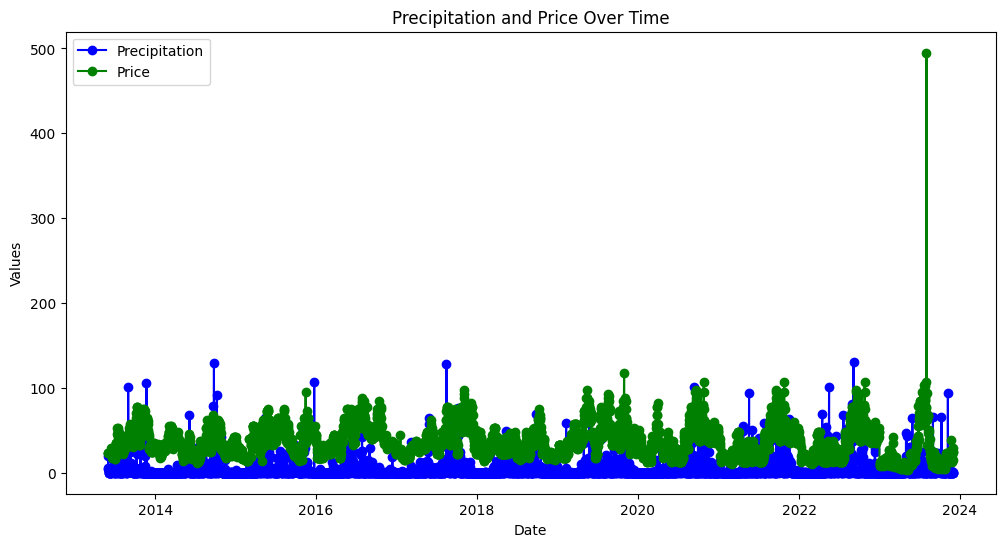

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(date, precipitation, label='Precipitation', marker='o', linestyle='-', color='blue')
plt.plot(date, price, label='Price', marker='o', linestyle='-', color='green')
plt.title('Precipitation and Price Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [14]:
features = merged_data[[' prcp', 'tempmin', 'tempmax', 'temp', 'humidity', 'Maximum']]
target = merged_data['Average']

In [15]:
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median' or 'most_frequent'
features_imputed = imputer.fit_transform(features)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=42)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
predictions = model.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 17.5575245214454


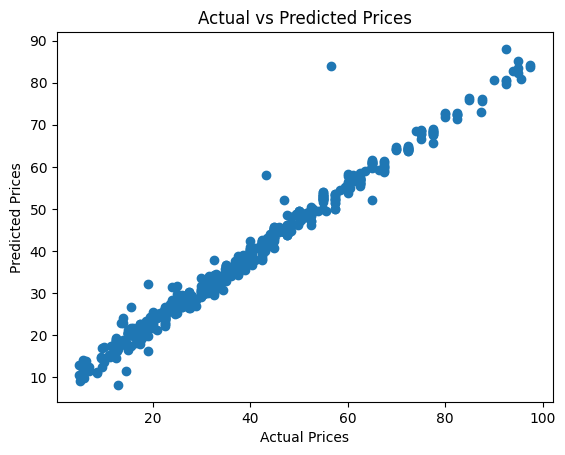

In [20]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [21]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predictions)
print("R-squared:", r_squared)

R-squared: 0.9499419753834643


In [26]:
future_data = pd.DataFrame({
    ' prcp': [0.1, 0.2, 0.0],  # Example precipitation values for future dates
    'tempmin': [20, 22, 21],   # Example minimum temperature values for future dates
    'tempmax': [30, 32, 31],   # Example maximum temperature values for future dates
    'temp': [25, 27, 26],      # Example temperature values for future dates
    'humidity': [50, 60, 55],  # Example humidity values for future dates
    'Maximum': [70, 65, 50] # Example maximum price values for future dates
})

In [27]:
# Make predictions for future dates using the trained model
future_predictions = model.predict(future_data)

# Create a DataFrame with the future dates and corresponding predictions
future_dates = pd.date_range(start='2024-01-01', end='2024-01-03')  # Example future dates
future_predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted_Price': future_predictions})

# Display the predictions for future dates
print(future_predictions_df)


        Date  Predicted_Price
0 2024-01-01        59.160680
1 2024-01-02        56.054463
2 2024-01-03        44.047734


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
